# INTRO
L'obiettivo di questo esercizio è quello di costruire un modello di machine learning in grado di distinguere i clienti frodatori dagli altri.

# DATASET
Il dataset è composto sia da colonne in chiaro che da colonne anonomizzate ed è una fotografia mensile dei clienti.
Di seguito la spiegazione delle colonne:

- *data_rif*: data di fine mese di riferimento
- *userid*: id del cliente
- *age*: età 
- *profession*: professione
- *region*: regione di residenza
- *account_balance*: saldo del conto a fine mese
- *num_trx_cd*: numero di transazioni con carta di debito eseguite nel mese
- *num_trx_cc*: numero di transazioni con carta di credito eseguite nel mese
- *num_trx_cp*: numero di transazioni con carta prepagata eseguite nel mese
- *num_mov_conto*: numero di movimenti di conto corrente nel mese
- *sum_mov_conto_pos*: somma degli importi dei movimenti in ingresso di conto corrente nel mese
- *sum_mov_conto_neg*: somma degli importi dei movimenti in uscita di conto corrente nel mese
- *num_prodotti*: numero di prodotti posseduti dal cliente
- *f2*, *f3*, *f4*, *f5*, *f6*, *f7*: features comportamentali anonimizzate
- *TARGET*: variabile target che indica se il cliente ha commesso una frode nei mesi successivi


# REQUISITI AGGIUNTIVI
- Possibile utilizzare qualunque libreria di ML purchè venga fornita la versione in modo da poter replicare i risultati
- Si preferiscono modelli "white-box" o spiegabili

# lettura dati

In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import average_precision_score, roc_auc_score, accuracy_score
import sys
#import plotly.graph_objs as go
#import plotly.figure_factory as ff
#from plotly import tools
#from plotly.offline import download_plotlyjs, plot
#import pickle

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [78]:
CONF_MATR=False

#CLASSIFIERS TESTED
RFC=True
ABC=True
CBC=True
XGBC=True 
LGBMC=True
LRC=True
SVMC=True
KNNC=True
MLPC=True

In [79]:
TEST_SIZE = 0.20 # test size using_train_test_split

#Common Classifiers parameters
NUM_ESTIMATORS=100
RANDOM_STATE = 2018
VERBOSE_EVAL = 50 #Print out metric result

In [58]:
DTYPES = {
    'data_rif': str,
    'userid': np.int64,
    'age':  np.int64,
    'profession': str,
    'region': str,
    'account_balance': np.float64,
    'num_trx_cd': np.float64,
    'num_trx_cc': np.float64,
    'num_trx_cp': np.float64,
    'num_mov_conto': np.int32,
    'sum_mov_conto_pos': np.int64,
    'sum_mov_conto_neg': np.int64,
    'num_prodotti': np.int64,
    'f2': np.int64,
    'f3': np.int64,
    'f4': np.int64,
    'f5': np.int64,
    'f6': np.float64,
    'f7': np.float64,
    'TARGET': np.int64
}

In [94]:
df = pd.read_csv("../data/frauds_dataset.csv", sep="~", dtype=DTYPES)

In [99]:
df.head()

,data_rif,userid,age,profession,region,account_balance,num_trx_cd,num_trx_cc,num_trx_cp,num_mov_conto,sum_mov_conto_pos,sum_mov_conto_neg,num_prodotti,f2,f3,f4,f5,f6,f7,TARGET
0,2022-07-31,1000510,23,Lavoratore autonomo,TOSCANA,65627.799269,0.0,0.0,0.0,10,3590,-370,2,88,60,8,20,21.141686,0.268369,0
1,2022-07-31,1001511,55,Lavoratore dipendente,BASILICATA,39335.109963,7.0,0.0,0.0,0,0,0,5,97,63,11,82,38.169452,0.672864,1
2,2022-07-31,1001726,23,Lavoratore autonomo,PUGLIA,-37466.828926,148.0,0.0,0.0,2,636,-294,10,90,49,31,71,38.602380,0.126743,0
3,2022-07-31,1002418,43,Studente,VALLE AOSTA,13864.880197,215.0,0.0,0.0,8,1064,-1640,3,99,66,52,57,31.505413,2.081956,1
4,2022-07-31,1002646,26,Studente,LOMBARDIA,-32625.910843,38.0,56.0,6.0,0,0,0,1,115,56,44,28,36.882651,0.210746,0


In [82]:
def convert_data_to_int(data):
    data_vect=list(map(int,data.split("-")))
    return 10000*data_vect[0] + 100*data_vect[1] + data_vect[2]

df["data_rif"] = list(map(convert_data_to_int, df["data_rif"]))
df.head()

,data_rif,userid,age,profession,region,account_balance,num_trx_cd,num_trx_cc,num_trx_cp,num_mov_conto,sum_mov_conto_pos,sum_mov_conto_neg,num_prodotti,f2,f3,f4,f5,f6,f7,TARGET
0,20220731,1000510,23,Lavoratore autonomo,TOSCANA,65627.799269,0.0,0.0,0.0,10,3590,-370,2,88,60,8,20,21.141686,0.268369,0
1,20220731,1001511,55,Lavoratore dipendente,BASILICATA,39335.109963,7.0,0.0,0.0,0,0,0,5,97,63,11,82,38.169452,0.672864,1
2,20220731,1001726,23,Lavoratore autonomo,PUGLIA,-37466.828926,148.0,0.0,0.0,2,636,-294,10,90,49,31,71,38.602380,0.126743,0
3,20220731,1002418,43,Studente,VALLE AOSTA,13864.880197,215.0,0.0,0.0,8,1064,-1640,3,99,66,52,57,31.505413,2.081956,1
4,20220731,1002646,26,Studente,LOMBARDIA,-32625.910843,38.0,56.0,6.0,0,0,0,1,115,56,44,28,36.882651,0.210746,0


In [93]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)
df.head()

,data_rif,userid,age,profession,region,account_balance,num_trx_cd,num_trx_cc,num_trx_cp,num_mov_conto,sum_mov_conto_pos,sum_mov_conto_neg,num_prodotti,f2,f3,f4,f5,f6,f7,TARGET
0,20220731,1000510,23,3,17,65627.799269,0.0,0.0,0.0,10,3590,-370,2,88,60,8,20,21.141686,0.268369,0
1,20220731,1001511,55,5,12,39335.109963,7.0,0.0,0.0,0,0,0,5,97,63,11,82,38.169452,0.672864,1
2,20220731,1001726,23,3,9,-37466.828926,148.0,0.0,0.0,2,636,-294,10,90,49,31,71,38.602380,0.126743,0
3,20220731,1002418,43,1,14,13864.880197,215.0,0.0,0.0,8,1064,-1640,3,99,66,52,57,31.505413,2.081956,1
4,20220731,1002646,26,1,16,-32625.910843,38.0,56.0,6.0,0,0,0,1,115,56,44,28,36.882651,0.210746,0


In [84]:
X_df=df.drop('TARGET', axis=1)
Y_df=df['TARGET']
scaler = RobustScaler()
X_df=scaler.fit_transform(X_df)
DTYPES.pop("TARGET")
data_df = pd.DataFrame(X_df, columns=DTYPES.keys())
DTYPES.update({'TARGET': np.int64})
data_df['TARGET']=Y_df
data_df.head()


,data_rif,userid,age,profession,region,account_balance,num_trx_cd,num_trx_cc,num_trx_cp,num_mov_conto,sum_mov_conto_pos,sum_mov_conto_neg,num_prodotti,f2,f3,f4,f5,f6,f7,TARGET
0,-1.003344,-0.994258,-0.142857,0.0,0.545455,0.475165,-0.132530,0.000000,0.000000,0.625,1.187169,-0.121272,0.000000,-0.270833,-0.379310,-0.821429,-0.333333,-0.524660,0.171661,0
1,-1.003344,-0.992588,4.428571,1.0,0.090909,0.280638,-0.048193,0.000000,0.000000,0.000,0.000000,0.000000,0.500000,-0.083333,-0.275862,-0.714286,0.080000,0.402819,1.123796,1
2,-1.003344,-0.992229,-0.142857,0.0,-0.181818,-0.287582,1.650602,0.000000,0.000000,0.125,0.210317,-0.096362,1.333333,-0.229167,-0.758621,0.000000,0.006667,0.426400,-0.161713,0
3,-1.003344,-0.991074,2.714286,-1.0,0.272727,0.092196,2.457831,0.000000,0.000000,0.500,0.351852,-0.537529,0.166667,-0.041667,-0.172414,0.750000,-0.086667,0.039838,4.440645,1
4,-1.003344,-0.990694,0.285714,-1.0,0.454545,-0.251766,0.325301,1.365854,0.193548,0.000,0.000000,0.000000,-0.166667,0.291667,-0.517241,0.464286,-0.280000,0.332729,0.036022,0


# analisi dati

In [85]:
def create_confusion_matrix(Y,preds):
    cm = pd.crosstab(Y, preds, rownames=['Actual'], colnames=['Predicted'])
    fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
    sns.heatmap(cm, 
                xticklabels=['Not Fraud', 'Fraud'],
                yticklabels=['Not Fraud', 'Fraud'],
                annot=True,ax=ax1,
                linewidths=.2,linecolor="Darkblue", cmap="Blues")
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()
    plt.close()

def compute_metrics(Y,preds,proba):
    #AUROC METRIC
    rfc_auroc=roc_auc_score(Y, proba)
    print(f'RFC AUROC score: {rfc_auroc}\n')
    #AUPRC OR AVERAGE-PRECISION METRIC (SUITABLE FOR UNBALANCED DATASETS)
    rfc_auprc=average_precision_score(Y, proba)
    print(f'RFC AUPRC score: {rfc_auprc}\n')
    #ACCURACY METRIC
    rfc_accuracy=accuracy_score(Y, preds)
    print(f'Accuracy score: {rfc_accuracy}\n')


In [91]:
print(data_df.describe())
#CHECH EVENTUAL NULL DATA (NOT FOUND)
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
print(pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose())
#CHECK EVENTUAL NULL FEATURES (FOUND)
print(data_df.isnull().any())
#CHECK DATA UNBALANCE
print('No Frauds', round(data_df['TARGET'].value_counts()[0]/len(data_df) * 100,2), '% of the dataset')
print('Frauds', round(data_df['TARGET'].value_counts()[1]/len(data_df) * 100,2), '% of the dataset')

           data_rif        userid           age    profession        region  \
count  24987.000000  24987.000000  24987.000000  24987.000000  24987.000000   
mean      -0.166379      0.058207      0.610638     -0.010906     -0.051147   
std        0.570234      0.666941      1.553983      0.720001      0.528613   
min       -1.003344     -0.995046     -0.428571     -1.500000     -1.000000   
25%       -0.668896     -0.494165     -0.285714     -0.500000     -0.545455   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.331104      0.505835      0.714286      0.500000      0.454545   
max        0.668896      1.674802      7.571429      1.000000      0.818182   

       account_balance    num_trx_cd    num_trx_cc    num_trx_cp  \
count     24987.000000  24787.000000  24768.000000  24785.000000   
mean         -0.005183      0.449241      0.592480      0.609567   
std           0.741459      0.796762      0.872029      0.896989   
min          -2.

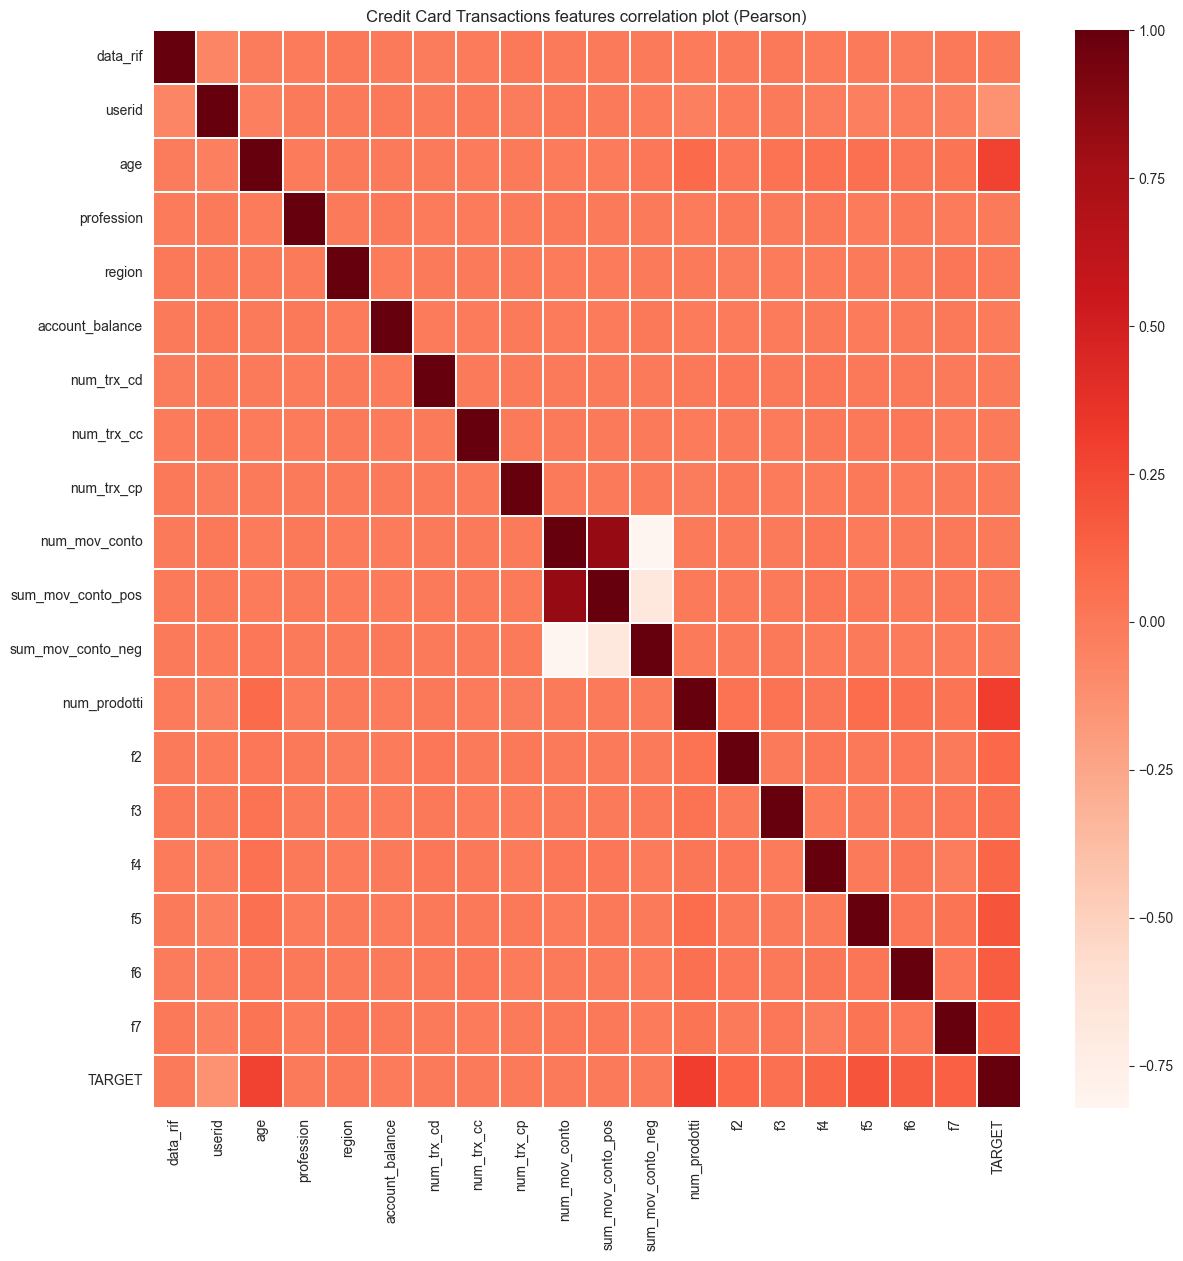

In [87]:
#FEATURES CORRELATION
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()
plt.close()

C:\Users\leoro\AppData\Local\Temp\ipykernel_26948\2226474808.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5,label="TARGET = 0")
C:\Users\leoro\AppData\Local\Temp\ipykernel_26948\2226474808.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t1[feature], bw_method=0.5,label="TARGET = 1")


<Figure size 640x480 with 0 Axes>

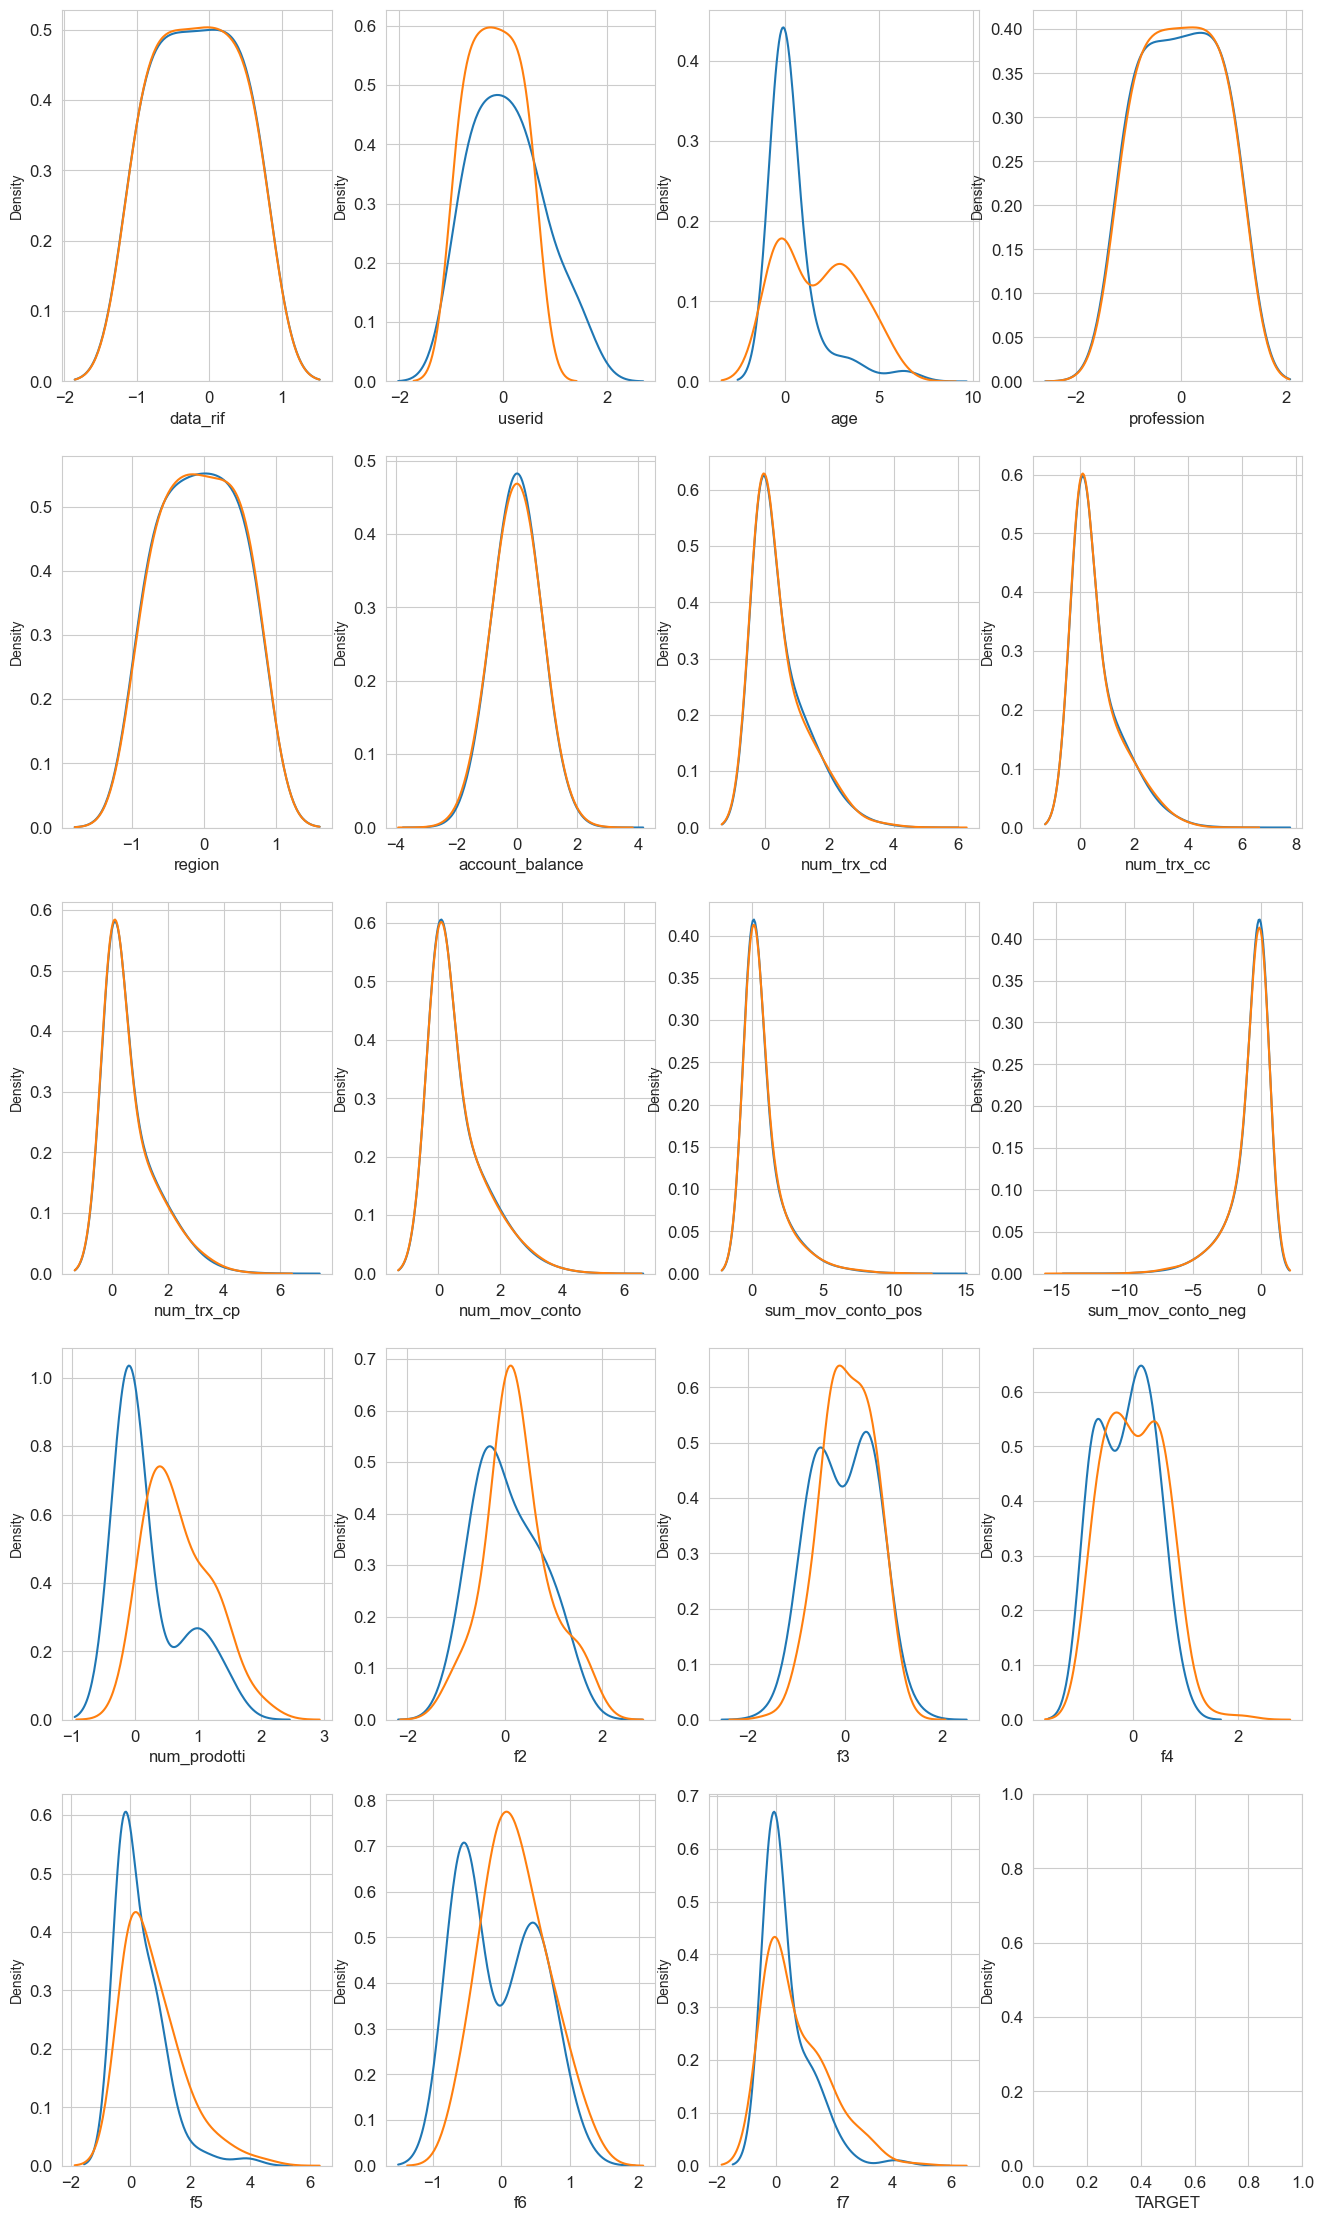

In [88]:
#FEATURES DENSITY
var = data_df.columns.values
i = 0
t0 = data_df.loc[data_df['TARGET'] == 0]
t1 = data_df.loc[data_df['TARGET'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(5,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(5,4,i)
    sns.kdeplot(t0[feature], bw_method=0.5,label="TARGET = 0")
    sns.kdeplot(t1[feature], bw_method=0.5,label="TARGET = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [96]:
#Fropping the features with very similar inter-class distributions helps the performances.
#Furthemore the first three removed features had also sparse NaN values, so also this problem is solved
data_df=data_df.drop('num_trx_cd', axis=1)
data_df=data_df.drop('num_trx_cc', axis=1)
data_df=data_df.drop('num_trx_cp', axis=1)
data_df=data_df.drop('num_mov_conto', axis=1)

# training del modello

In [97]:
train_df, test_df=train_test_split(data_df,test_size=TEST_SIZE,random_state=RANDOM_STATE)
print(f'Number of train samples: {train_df.shape[0]}')
print(f'Number of test samples: {test_df.shape[0]}')
X_train=train_df.drop('TARGET', axis=1)
X_test=test_df.drop('TARGET', axis=1)
Y_train=train_df['TARGET']
Y_test=test_df['TARGET']

Number of train samples: 19989
Number of test samples: 4998


In [98]:
if ABC:
    #model = CatBoostClassifier(random_seed = RANDOM_STATE, metric_period = VERBOSE_EVAL)
    '''
    model = LogisticRegression()
    model = RandomForestClassifier(verbose=1, n_estimators=NUM_ESTIMATORS)
    
    model = LGBMClassifier(
                nthread=-1,
                n_estimators=2000,
                learning_rate=0.01,
                num_leaves=80,
                colsample_bytree=0.98,
                subsample=0.78,
                reg_alpha=0.04,
                reg_lambda=0.073,
                subsample_for_bin=50,
                boosting_type='gbdt',
                is_unbalance=False,
                min_split_gain=0.025,
                min_child_weight=40,
                min_child_samples=510,
                objective='binary',
                metric='auc',
                silent=-1,
                verbose=-1,
                feval=None)
    
    model = CatBoostClassifier(iterations=1000,
                            learning_rate=0.02,
                            depth=12,
                            eval_metric='AUC',
                            random_seed = RANDOM_STATE,
                            bagging_temperature = 0.2,
                            od_type='Iter',
                            metric_period = VERBOSE_EVAL,
                            od_wait=100)
    '''
    
    print("AdaBoost")
    abc = AdaBoostClassifier(random_state=RANDOM_STATE)#, n_estimators=NUM_ESTIMATORS estimator=model,
    abc.fit(X_train, Y_train)
    abc_preds = abc.predict(X_test)
    abc_preds_proba=abc.predict_proba(X_test)[:, 1]
    if CONF_MATR:
        #CONFUSION MATRIX
        create_confusion_matrix(Y_test, abc_preds)
    compute_metrics(Y_test, abc_preds, abc_preds_proba)
#SECOND BEST   
if CBC:
    print("CatBoost")
    '''
    cbc = CatBoostClassifier(random_seed = RANDOM_STATE, metric_period = VERBOSE_EVAL)
    '''
    cbc = CatBoostClassifier(iterations=1000,
                            learning_rate=0.02,
                            depth=12,
                            eval_metric='AUC',
                            random_seed = RANDOM_STATE,
                            bagging_temperature = 0.2,
                            od_type='Iter',
                            metric_period = VERBOSE_EVAL,
                            od_wait=100)
    
        
    cbc.fit(X_train, Y_train)
    cbc_preds = cbc.predict(X_test)
    cbc_preds_proba=cbc.predict_proba(X_test)[:, 1]
    if CONF_MATR:
        #CONFUSION MATRIX
        create_confusion_matrix(Y_test, cbc_preds)
    compute_metrics(Y_test, cbc_preds, cbc_preds_proba)
#BEST
if XGBC:
    print("XGBC")
    xgbc = XGBClassifier(random_state=RANDOM_STATE,verbosity=2)#n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic'
    xgbc.fit(X_train, Y_train)
    xgbc_preds = xgbc.predict(X_test)
    xgbc_preds_proba=xgbc.predict_proba(X_test)[:, 1]
    if CONF_MATR:
        #CONFUSION MATRIX
        create_confusion_matrix(Y_test, xgbc_preds)
    compute_metrics(Y_test, xgbc_preds, xgbc_preds_proba)
if LGBMC:
    print("LGBM")
    lgbmc = LGBMClassifier(
                nthread=-1,
                n_estimators=2000,
                learning_rate=0.01,
                num_leaves=80,
                colsample_bytree=0.98,
                subsample=0.78,
                reg_alpha=0.04,
                reg_lambda=0.073,
                subsample_for_bin=50,
                boosting_type='gbdt',
                is_unbalance=False,
                min_split_gain=0.025,
                min_child_weight=40,
                min_child_samples=510,
                objective='binary',
                metric='auc',
                silent=-1,
                verbose=-1,
                feval=None)
    lgbmc.fit(X_train, Y_train)
    lgbmc_preds = lgbmc.predict(X_test)
    lgbmc_preds_proba=lgbmc.predict_proba(X_test)[:, 1]
    if CONF_MATR:
        #CONFUSION MATRIX
        create_confusion_matrix(Y_test, lgbmc_preds)
    compute_metrics(Y_test, lgbmc_preds, lgbmc_preds_proba)
if LRC:
    print("LogisticRegression")
    lrc = LogisticRegression()
    lrc.fit(X_train, Y_train)
    lrc_preds = lrc.predict(X_test)
    lrc_preds_proba=lrc.predict_proba(X_test)[:, 1]
    if CONF_MATR:
        #CONFUSION MATRIX
        create_confusion_matrix(Y_test, lrc_preds)
    compute_metrics(Y_test, lrc_preds, lrc_preds_proba)
if SVMC:
    print("SVC")
    svmc = svm.SVC(probability=True, kernel='rbf', verbose=True)
    svmc.fit(X_train, Y_train)
    svmc_preds = svmc.predict(X_test)
    svmc_preds_proba=svmc.predict_proba(X_test)[:, 1]
    if CONF_MATR:
        #CONFUSION MATRIX
        create_confusion_matrix(Y_test, svmc_preds)
    compute_metrics(Y_test, svmc_preds, svmc_preds_proba)
if KNNC:
    print("KNeighbors")
    knnc = KNeighborsClassifier()
    knnc.fit(X_train, Y_train)
    knnc_preds = knnc.predict(X_test)
    knnc_preds_proba=knnc.predict_proba(X_test)[:, 1]
    if CONF_MATR:
        #CONFUSION MATRIX
        create_confusion_matrix(Y_test, knnc_preds)
    compute_metrics(Y_test, knnc_preds, knnc_preds_proba)
if MLPC:
    print("MLP")
    mlpc = MLPClassifier(hidden_layer_sizes=(200,),random_state=RANDOM_STATE, max_iter=20000)
    mlpc.fit(X_train, Y_train)
    mlpc_preds = mlpc.predict(X_test)
    mlpc_preds_proba=mlpc.predict_proba(X_test)[:, 1]
    if CONF_MATR:
        #CONFUSION MATRIX
        create_confusion_matrix(Y_test, mlpc_preds)
    compute_metrics(Y_test, mlpc_preds, mlpc_preds_proba)

AdaBoost


c:\Users\leoro\anaconda3\envs\pylearn2\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


RFC AUROC score: 0.9914974951803696

RFC AUPRC score: 0.9565811739949692

Accuracy score: 0.9699879951980792

CatBoost
0:	total: 201ms	remaining: 3m 20s
50:	total: 7.99s	remaining: 2m 28s
100:	total: 16.1s	remaining: 2m 23s
150:	total: 23.1s	remaining: 2m 9s
200:	total: 30s	remaining: 1m 59s
250:	total: 36.7s	remaining: 1m 49s
300:	total: 43.5s	remaining: 1m 41s
350:	total: 50.1s	remaining: 1m 32s
400:	total: 57.2s	remaining: 1m 25s
450:	total: 1m 4s	remaining: 1m 18s
500:	total: 1m 10s	remaining: 1m 10s
550:	total: 1m 18s	remaining: 1m 3s
600:	total: 1m 24s	remaining: 56.2s
650:	total: 1m 31s	remaining: 49s
700:	total: 1m 38s	remaining: 42s
750:	total: 1m 45s	remaining: 34.9s
800:	total: 1m 51s	remaining: 27.8s
850:	total: 1m 58s	remaining: 20.7s
900:	total: 2m 5s	remaining: 13.7s
950:	total: 2m 11s	remaining: 6.78s
999:	total: 2m 18s	remaining: 0us
RFC AUROC score: 0.9965277838029184

RFC AUPRC score: 0.9848011170190013

Accuracy score: 0.9821928771508603

XGBC
RFC AUROC score: 0.996

# valutazione delle performance 

In [ ]:
'''
I have done the performance evaluation after each different training in the previous section.

The best is the XGBC:
RFC AUROC score: 0.9966725028588087
RFC AUPRC score: 0.9845271311283841
Accuracy score: 0.985594237695078

Performances are very good so there is no need of further preprocessing, eventual upsampling or downsampling, or 
ensemble of classifiers
'''